In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

In [3]:
N = 250
Npix = 500
zmax = np.radians(90)  # Degrees
arr = np.arange(-N, N)
x_arr, y_arr = np.meshgrid(arr, arr)
radius = np.sqrt(x_arr**2 + y_arr**2) / float(N)
za_array = radius * zmax
az_array = np.arctan2(y_arr, x_arr)

In [4]:
comp00 = -np.sin(az_array)
comp01 = np.cos(az_array)
comp10 = np.cos(za_array) * np.cos(az_array)
comp11 = np.cos(za_array) * np.sin(az_array)

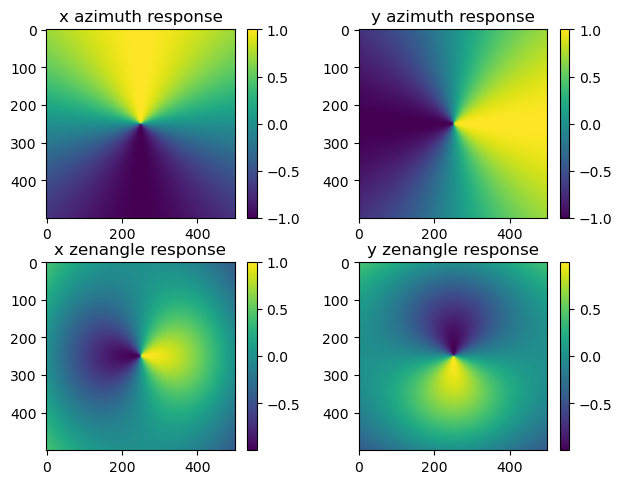

In [30]:
fig, ax = plt.subplots(2, 2)
fig.tight_layout()
nticks = 2
tick_step = round(Npix/float(nticks))
pc00 = ax[0, 0].imshow(comp00)
ax[0, 0].set_title("x azimuth response")
fig.colorbar(pc00, ax=ax[0, 0])
pc01 = ax[0, 1].imshow(comp01)
ax[0, 1].set_title("y azimuth response")
fig.colorbar(pc01, ax=ax[0, 1])
pc10 = ax[1, 0].imshow(comp10)
ax[1, 0].set_title("x zenangle response")
fig.colorbar(pc10, ax=ax[1, 0])
pc11 = ax[1, 1].imshow(comp11)
ax[1, 1].set_title("y zenangle response")
fig.colorbar(pc11, ax=ax[1, 1])

In [32]:
power0 = comp00**2 + comp10**2
power1 = comp01**2 + comp11**2

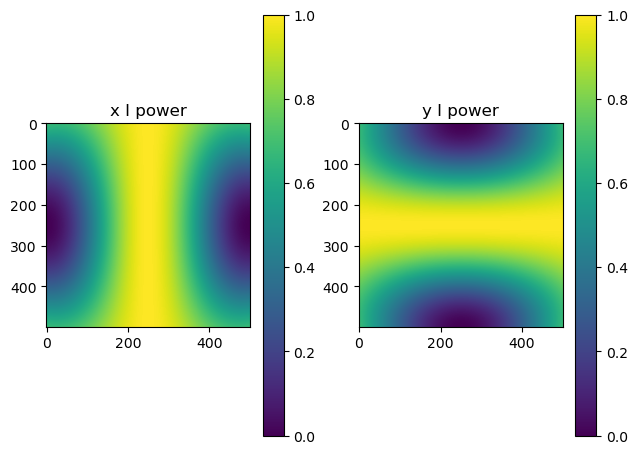

In [33]:
fig, ax = plt.subplots(1, 2)
fig.tight_layout()
px = ax[0].imshow(power0)
ax[0].set_title("x I power")
fig.colorbar(px, ax=ax[0])
py = ax[1].imshow(power1)
ax[1].set_title("y I power")
fig.colorbar(px, ax=ax[1])

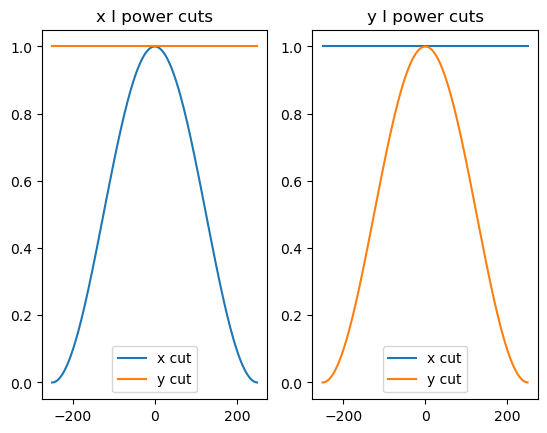

In [34]:
fig, ax = plt.subplots(1, 2)
ax[0].plot(arr, power0[250, :], label="x cut")
ax[0].plot(arr, power0[:,250], label="y cut")
ax[0].set_title("x I power cuts")
ax[0].legend()
ax[1].plot(arr, power1[250, :], label="x cut")
ax[1].plot(arr, power1[:,250], label="y cut")
ax[1].set_title("y I power cuts")
ax[1].legend()

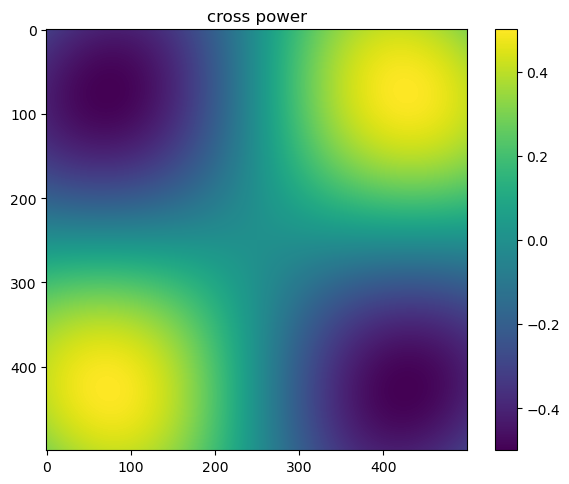

In [35]:
# cross powers:
power_xy = (comp00 * comp01) + (comp10 * comp11)
fig, ax = plt.subplots(1, 1)
fig.tight_layout()
pxy = ax.imshow(power_xy)
ax.set_title("cross power")
fig.colorbar(pxy, ax=ax)

2.220446049250313e-16

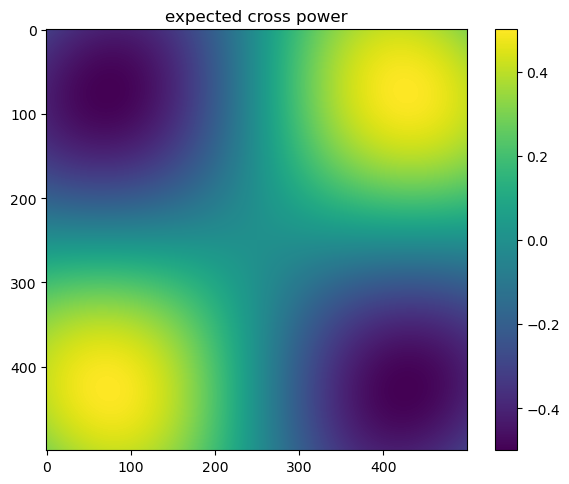

In [39]:
exp_pxy = -np.sin(za_array)**2 * np.sin(2 * az_array)/2
fig, ax = plt.subplots(1, 1)
fig.tight_layout()
epxy = ax.imshow(exp_pxy)
ax.set_title("expected cross power")
fig.colorbar(epxy, ax=ax)
np.max(np.abs(exp_pxy - power_xy))

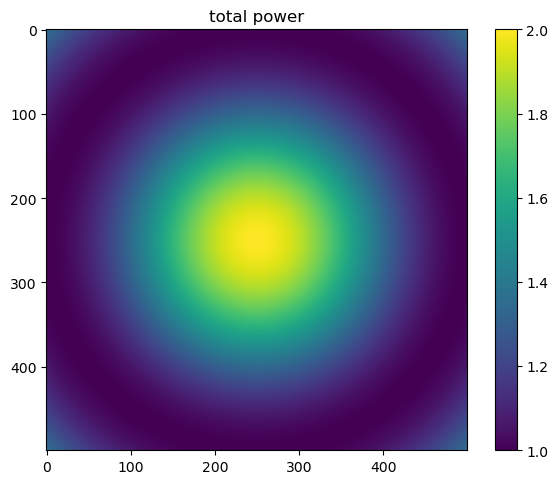

In [14]:
p_total = power0 + power1
fig, ax = plt.subplots(1, 1)
fig.tight_layout()
ptot = ax.imshow(p_total)
ax.set_title("total power")
fig.colorbar(ptot, ax=ax)